<a href="https://colab.research.google.com/github/victorananias/alura-machine-learning-001/blob/master/ML_004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dataframe = pd.read_csv(uri)
dataframe.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
swap = {
    0: 1,
    1: 0
}

dataframe['finished'] = dataframe.unfinished.map(swap)
dataframe.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
dataframe.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


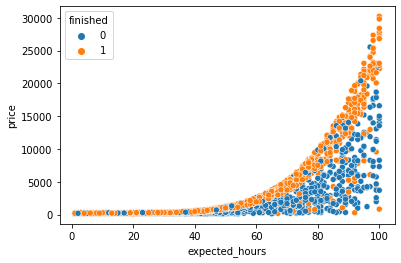

In [5]:
import seaborn as sns

sns.scatterplot(x = 'expected_hours', y = 'price', data = dataframe, hue = 'finished')

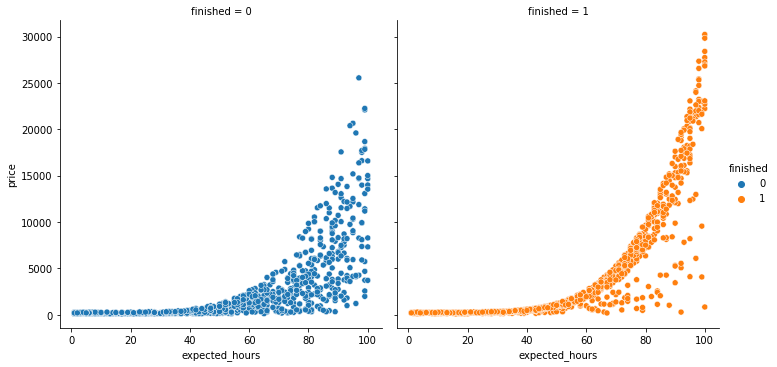

In [6]:

sns.relplot(x = 'expected_hours', y = 'price', hue = 'finished', col='finished', data = dataframe)

In [7]:
x = dataframe[['expected_hours',  'price']]
y = dataframe['finished']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# o random_state torna a randomização "fixa"
SEED = 5
np.random.seed(SEED)
# o stratify mantem a proporção de y nos dados utilizados
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print('Treinaremos com %d elementos e testaremos %d elementos.' % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)

predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print('A acurácia foi de %.2f%%' % accuracy)

Treinaremos com 1617 elementos e testaremos 540 elementos.
A acurácia foi de 64.44%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
baseline = np.ones(540)

baseline_accuracy = accuracy_score(test_y, baseline) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' % baseline_accuracy)

A acurácia do algoritmo de baseline foi de 52.59%


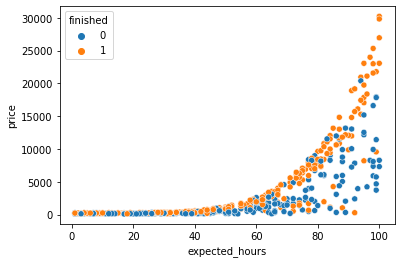

In [10]:

sns.scatterplot(x = 'expected_hours', y = 'price', data = test_x, hue = test_y)

In [11]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

print(x_min, x_max, y_min, y_max)


1 100 100 30223


In [12]:
pixels = 100
axe_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axe_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axe_x, axe_y)

points = np.c_[xx.ravel(), yy.ravel()]

In [13]:
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [14]:
z = model.predict(points)
z = z.reshape(xx.shape)

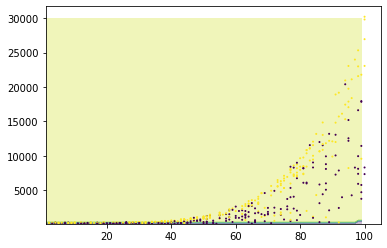

In [15]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(test_x.expected_hours, test_x.price, c = test_y, s = 1)

# DECISION BOUNDARY

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(
    x, y, test_size = 0.25, stratify = y
)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_train_x), len(raw_test_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


In [39]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Igualar a escala do treino e do teste
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)


model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("A acurácia foi %.2f%%" % accuracy)

A acurácia foi 66.85%


array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

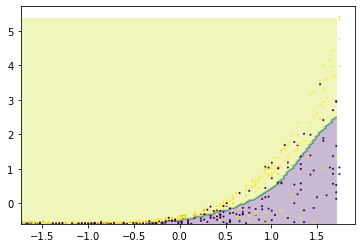

In [48]:
import matplotlib.pyplot as plt

data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
axe_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axe_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axe_x, axe_y)

points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(data_x, data_y, c = test_y, s = 1)

# DECISION BOUNDARY